In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Read the Data
d=pd.read_csv(r"C:\Users\Vaibhav Kumar\Downloads\retail_sales_dataset.csv")


In [3]:
d

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [9]:
d.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
d.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [15]:
d.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [17]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [19]:
d.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [22]:
d.shape

(1000, 9)

In [25]:
d.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [26]:
# Cleaning is done....

# Analysis and Visualization

In [28]:
#How many product_category in our data?
d['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [29]:
#Represent in our graph..

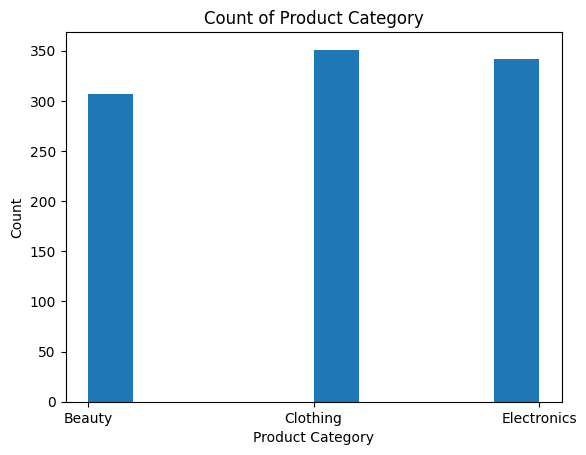

In [40]:
plt.hist(x='Product Category',data=d)
plt.title("Count of Product Category")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

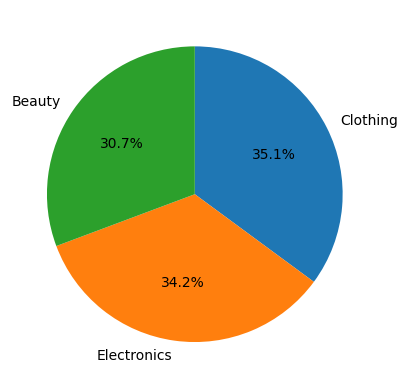

In [46]:
#Ratio of Product cateogry?
plt.pie(list(d['Product Category'].value_counts()),labels=list(d['Product Category'].value_counts().keys()),autopct='%0.1f%%',
startangle=90,counterclock=False)
plt.show()

In [8]:
#Realation between Product category and Quantity?
a=d.groupby('Product Category')['Quantity'].value_counts()
a

Product Category  Quantity
Beauty            3           85
                  2           75
                  1           74
                  4           73
Clothing          4           97
                  1           88
                  3           86
                  2           80
Electronics       4           93
                  1           91
                  2           88
                  3           70
Name: count, dtype: int64

In [12]:
b=d.groupby('Product Category')['Quantity'].sum()
b

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

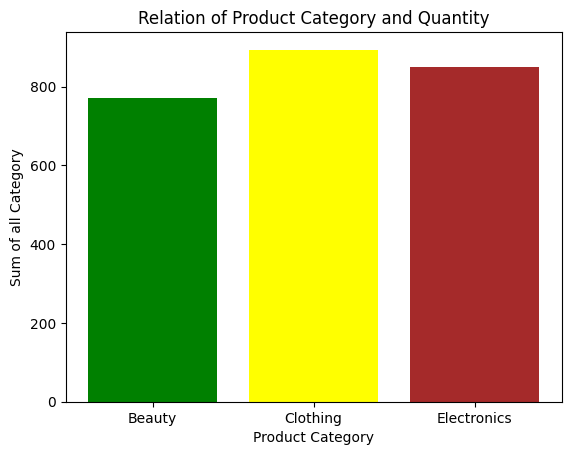

In [38]:
plt.bar(x=b.index,height=b.values,color=['Green','Yellow','Brown'],data=b)
plt.title("Relation of Product Category and Quantity")
plt.xlabel("Product Category")
plt.ylabel("Sum of all Category")
plt.show()

In [39]:
#Which Gender bought which product for how much?
t=d.groupby(['Gender','Product Category'])['Total Amount'].sum()
t


Gender  Product Category
Female  Beauty              74830
        Clothing            81275
        Electronics         76735
Male    Beauty              68685
        Clothing            74305
        Electronics         80170
Name: Total Amount, dtype: int64

In [50]:
a=d['Gender'].value_counts()
a

Gender
Female    510
Male      490
Name: count, dtype: int64

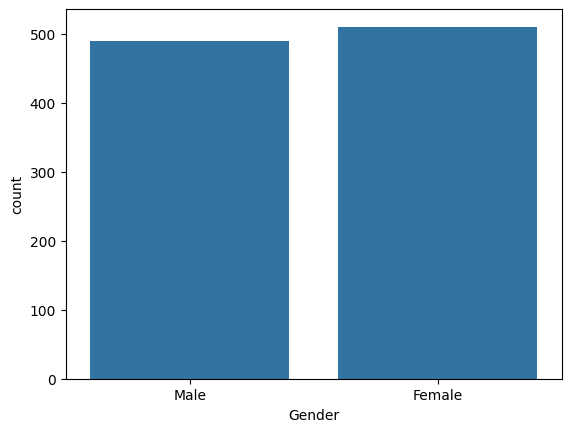

In [79]:
sns.countplot(d,x='Gender')
plt.show()

In [80]:
d['Date'].value_counts().nlargest(10)

Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-08-05     8
2023-02-05     8
2023-10-11     7
2023-04-23     7
2023-11-02     6
2023-12-23     6
2023-04-19     6
Name: count, dtype: int64

In [69]:
#Relation between Date and Product Category and price per unit?
s=d.groupby(['Date','Product Category'])['Price per Unit'].sum().nlargest(10)
s

Date        Product Category
2023-05-23  Electronics         1430
2023-04-23  Beauty              1375
2023-05-16  Electronics         1350
2023-12-09  Electronics         1325
2023-06-24  Electronics         1300
2023-07-14  Beauty              1155
2023-07-28  Beauty              1100
2023-12-08  Clothing            1100
2023-12-29  Beauty              1100
2023-08-05  Electronics         1030
Name: Price per Unit, dtype: int64

In [84]:
d.groupby('Gender')['Age'].value_counts().nlargest(10)

Gender  Age
Female  43     19
        64     19
        51     17
Male    54     17
Female  46     16
Male    62     16
        57     16
        31     16
Female  42     15
        26     15
Name: count, dtype: int64

In [87]:
#Relation date ,Gender and Quantity?
d.groupby(['Date','Gender'])['Quantity'].sum().nlargest(20)

Date        Gender
2023-05-23  Female    20
2023-06-24  Male      15
2023-07-14  Male      15
2023-10-03  Male      15
2023-02-17  Male      14
2023-03-03  Female    14
2023-03-06  Female    14
2023-05-16  Male      14
2023-02-05  Female    13
2023-02-11  Male      12
2023-02-24  Male      12
2023-04-19  Female    12
2023-05-16  Female    12
2023-08-31  Female    12
2023-10-29  Female    12
2023-12-05  Female    12
2023-12-26  Female    12
2023-04-23  Female    11
2023-05-22  Female    11
2023-07-14  Female    11
Name: Quantity, dtype: int64

In [89]:
#Which Gender is Highest Price Purchased?
d.groupby('Gender')['Total Amount'].sum()

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

In [90]:
d.groupby('Gender')['Total Amount'].value_counts()

Gender  Total Amount
Female  50              56
        100             52
        900             34
        200             32
        1200            29
        1000            28
        25              27
        300             26
        75              25
        2000            24
        500             24
        90              24
        30              24
        1500            23
        120             22
        60              22
        150             21
        600             17
Male    50              59
        100             56
        200             30
        900             28
        30              27
        1500            27
        500             27
        1200            25
        2000            25
        25              24
        60              23
        120             21
        1000            21
        150             21
        90              20
        300             20
        75              18
        600             18
Name: c